In [ ]:
# установка tensorflow
!pip install tensorflow

In [ ]:
# импорт необходимых библиотек
import numpy as np
import os
import pandas as pd
import warnings
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import plotly.express as px
import plotly.graph_objects as go
from sklearn.model_selection import cross_val_score
import missingno as msgn
from sklearn import linear_model
import joblib
import librosa
from sklearn.metrics import *
import argparse
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from keras.callbacks import ModelCheckpoint, EarlyStopping
from scipy.interpolate import UnivariateSpline
from matplotlib import pyplot as plt
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)

In [ ]:
# загружаем ссылку на CSV-файл
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# чтение датасета
dataframe = pd.read_csv('/content/drive/MyDrive/File/voice.csv')

In [ ]:
# рассмотрим информацию о датасете
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   meanfreq  3168 non-null   float64
 1   sd        3168 non-null   float64
 2   median    3168 non-null   float64
 3   Q25       3168 non-null   float64
 4   Q75       3168 non-null   float64
 5   IQR       3168 non-null   float64
 6   skew      3168 non-null   float64
 7   kurt      3168 non-null   float64
 8   sp.ent    3168 non-null   float64
 9   sfm       3168 non-null   float64
 10  mode      3168 non-null   float64
 11  centroid  3168 non-null   float64
 12  meanfun   3168 non-null   float64
 13  minfun    3168 non-null   float64
 14  maxfun    3168 non-null   float64
 15  meandom   3168 non-null   float64
 16  mindom    3168 non-null   float64
 17  maxdom    3168 non-null   float64
 18  dfrange   3168 non-null   float64
 19  modindx   3168 non-null   float64
 20  label     3168 non-null   obje

In [ ]:
# выведем первые 10 строк датасета
dataframe.head(10)

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,0.000000,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,0.000000,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,0.000000,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,0.083878,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,0.104261,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male
5,0.132786,0.079557,0.119090,0.067958,0.209592,0.141634,1.932562,8.308895,0.963181,0.738307,0.112555,0.132786,0.110132,0.017112,0.253968,0.298222,0.007812,2.726562,2.718750,0.125160,male
6,0.150762,0.074463,0.160106,0.092899,0.205718,0.112819,1.530643,5.987498,0.967573,0.762638,0.086197,0.150762,0.105945,0.026230,0.266667,0.479620,0.007812,5.312500,5.304688,0.123992,male
7,0.160514,0.076767,0.144337,0.110532,0.231962,0.121430,1.397156,4.766611,0.959255,0.719858,0.128324,0.160514,0.093052,0.017758,0.144144,0.301339,0.007812,0.539062,0.531250,0.283937,male
8,0.142239,0.078018,0.138587,0.088206,0.208587,0.120381,1.099746,4.070284,0.970723,0.770992,0.219103,0.142239,0.096729,0.017957,0.250000,0.336476,0.007812,2.164062,2.156250,0.148272,male
9,0.134329,0.080350,0.121451,0.075580,0.201957,0.126377,1.190368,4.787310,0.975246,0.804505,0.011699,0.134329,0.105881,0.019300,0.262295,0.340365,0.015625,4.695312,4.679688,0.089920,male


In [ ]:
# выведем последние 10 строк датасета
dataframe.tail(10)

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
3158,0.183667,0.040607,0.182534,0.156480,0.207646,0.051166,2.054138,7.483019,0.898138,0.313925,0.177040,0.183667,0.149237,0.018648,0.262295,0.550312,0.007812,3.421875,3.414062,0.166503,female
3159,0.168794,0.085842,0.188980,0.095558,0.240229,0.144671,1.462248,5.077956,0.956201,0.706861,0.184442,0.168794,0.182863,0.020699,0.271186,0.988281,0.007812,5.882812,5.875000,0.268617,female
3160,0.151771,0.089147,0.185970,0.058159,0.230199,0.172040,1.227710,4.304354,0.962045,0.744590,0.230547,0.151771,0.201600,0.023426,0.266667,0.766741,0.007812,4.007812,4.000000,0.192220,female
3161,0.170656,0.081237,0.184277,0.113012,0.239096,0.126084,1.378256,5.431663,0.950750,0.658558,0.161506,0.170656,0.198475,0.160000,0.253968,0.414062,0.007812,0.734375,0.726562,0.336918,female
3162,0.146023,0.092525,0.183434,0.041747,0.224337,0.182590,1.384981,5.118927,0.948999,0.659825,0.215482,0.146023,0.195640,0.039506,0.275862,0.533854,0.007812,2.992188,2.984375,0.258924,female
3163,0.131884,0.084734,0.153707,0.049285,0.201144,0.151859,1.762129,6.630383,0.962934,0.763182,0.200836,0.131884,0.182790,0.083770,0.262295,0.832899,0.007812,4.210938,4.203125,0.161929,female
3164,0.116221,0.089221,0.076758,0.042718,0.204911,0.162193,0.693730,2.503954,0.960716,0.709570,0.013683,0.116221,0.188980,0.034409,0.275862,0.909856,0.039062,3.679688,3.640625,0.277897,female
3165,0.142056,0.095798,0.183731,0.033424,0.224360,0.190936,1.876502,6.604509,0.946854,0.654196,0.008006,0.142056,0.209918,0.039506,0.275862,0.494271,0.007812,2.937500,2.929688,0.194759,female
3166,0.143659,0.090628,0.184976,0.043508,0.219943,0.176435,1.591065,5.388298,0.950436,0.675470,0.212202,0.143659,0.172375,0.034483,0.250000,0.791360,0.007812,3.593750,3.585938,0.311002,female
3167,0.165509,0.092884,0.183044,0.070072,0.250827,0.180756,1.705029,5.769115,0.938829,0.601529,0.267702,0.165509,0.185607,0.062257,0.271186,0.227022,0.007812,0.554688,0.546875,0.350000,female


In [ ]:
# рассмотрим сводную статистическую информацию о датасете
dataframe.describe()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
count,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000
mean,0.180907,0.057126,0.185621,0.140456,0.224765,0.084309,3.140168,36.568461,0.895127,0.408216,0.165282,0.180907,0.142807,0.036802,0.258842,0.829211,0.052647,5.047277,4.994630,0.173752
std,0.029918,0.016652,0.036360,0.048680,0.023639,0.042783,4.240529,134.928661,0.044980,0.177521,0.077203,0.029918,0.032304,0.019220,0.030077,0.525205,0.063299,3.521157,3.520039,0.119454
min,0.039363,0.018363,0.010975,0.000229,0.042946,0.014558,0.141735,2.068455,0.738651,0.036876,0.000000,0.039363,0.055565,0.009775,0.103093,0.007812,0.004883,0.007812,0.000000,0.000000
25%,0.163662,0.041954,0.169593,0.111087,0.208747,0.042560,1.649569,5.669547,0.861811,0.258041,0.118016,0.163662,0.116998,0.018223,0.253968,0.419828,0.007812,2.070312,2.044922,0.099766
50%,0.184838,0.059155,0.190032,0.140286,0.225684,0.094280,2.197101,8.318463,0.901767,0.396335,0.186599,0.184838,0.140519,0.046110,0.271186,0.765795,0.023438,4.992188,4.945312,0.139357
75%,0.199146,0.067020,0.210618,0.175939,0.243660,0.114175,2.931694,13.648905,0.928713,0.533676,0.221104,0.199146,0.169581,0.047904,0.277457,1.177166,0.070312,7.007812,6.992188,0.209183
max,0.251124,0.115273,0.261224,0.247347,0.273469,0.252225,34.725453,1309.612887,0.981997,0.842936,0.280000,0.251124,0.237636,0.204082,0.279114,2.957682,0.458984,21.867188,21.843750,0.932374


In [ ]:
# приведем названия колонок к нижнему регистру и удалим знаки препинания
dataframe.columns = dataframe.columns.str.lower().str.replace('[^\w\s]', '', regex=True)

dataframe

,meanfreq,sd,median,q25,q75,iqr,skew,kurt,spent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,0.000000,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,0.000000,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,0.000000,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,0.083878,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,0.104261,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3163,0.131884,0.084734,0.153707,0.049285,0.201144,0.151859,1.762129,6.630383,0.962934,0.763182,0.200836,0.131884,0.182790,0.083770,0.262295,0.832899,0.007812,4.210938,4.203125,0.161929,female
3164,0.116221,0.089221,0.076758,0.042718,0.204911,0.162193,0.693730,2.503954,0.960716,0.709570,0.013683,0.116221,0.188980,0.034409,0.275862,0.909856,0.039062,3.679688,3.640625,0.277897,female
3165,0.142056,0.095798,0.183731,0.033424,0.224360,0.190936,1.876502,6.604509,0.946854,0.654196,0.008006,0.142056,0.209918,0.039506,0.275862,0.494271,0.007812,2.937500,2.929688,0.194759,female
3166,0.143659,0.090628,0.184976,0.043508,0.219943,0.176435,1.591065,5.388298,0.950436,0.675470,0.212202,0.143659,0.172375,0.034483,0.250000,0.791360,0.007812,3.593750,3.585938,0.311002,female


In [ ]:
# выполним анализ пропущенных значений, если столбцы содержат более 50% пропущенных значений, то заполним их медианными значениями
def clean(df):

    print("*"*35)
    print('\nIs there any missing value ?\n')
    data = df.isna().sum().reset_index().sort_values(by=0, ascending=False)
    data.columns = ["col names", "missing appearences"]
    missing_counter = 0


    for nums in data['missing appearences']:
        if nums!=0:
            missing_counter+=1

    if missing_counter!=0:
        print('Yes There Is Missing values')
        clean_data = data[data["missing appearences"] != 0].shape[0]
        columns = df.shape[1]
        rows = df.shape[0]
        print('Trying to find all missing values..')
        data["%missing from total"] = data[data["missing appearences"]!=0]["missing appearences"]/rows
        mis_data = data[data["%missing from total"] > 0.5].shape[0]
        drop_data = np.array(data[data["%missing from total"] > 0.5]["col names"])
        print('Done.\n')
        print("{}/{} total missing data in terms of column shape.".format(clean_data, columns))
        print("{}/{} columns  will be dropped. name of the drop column is {}".format(mis_data, columns,drop_data))

        fill_missing_vals(mis_data[mis_data.columns.isin(drop_data)],mis_data.columns)

        return data, drop_data

    else:

        print('\nThere is no missing value in our dataset\n')
        msgn.bar(dataframe)
        print('\nAll numerical values fully filled\n\n')

def fill_missing_vals(df, fill_missing):
    for col in fill_missing:
        df[col].fillna(df[col].median(skipna=True), inplace=True)
    return df

***********************************

Is there any missing value ?


There is no missing value in our dataset


All numerical values fully filled




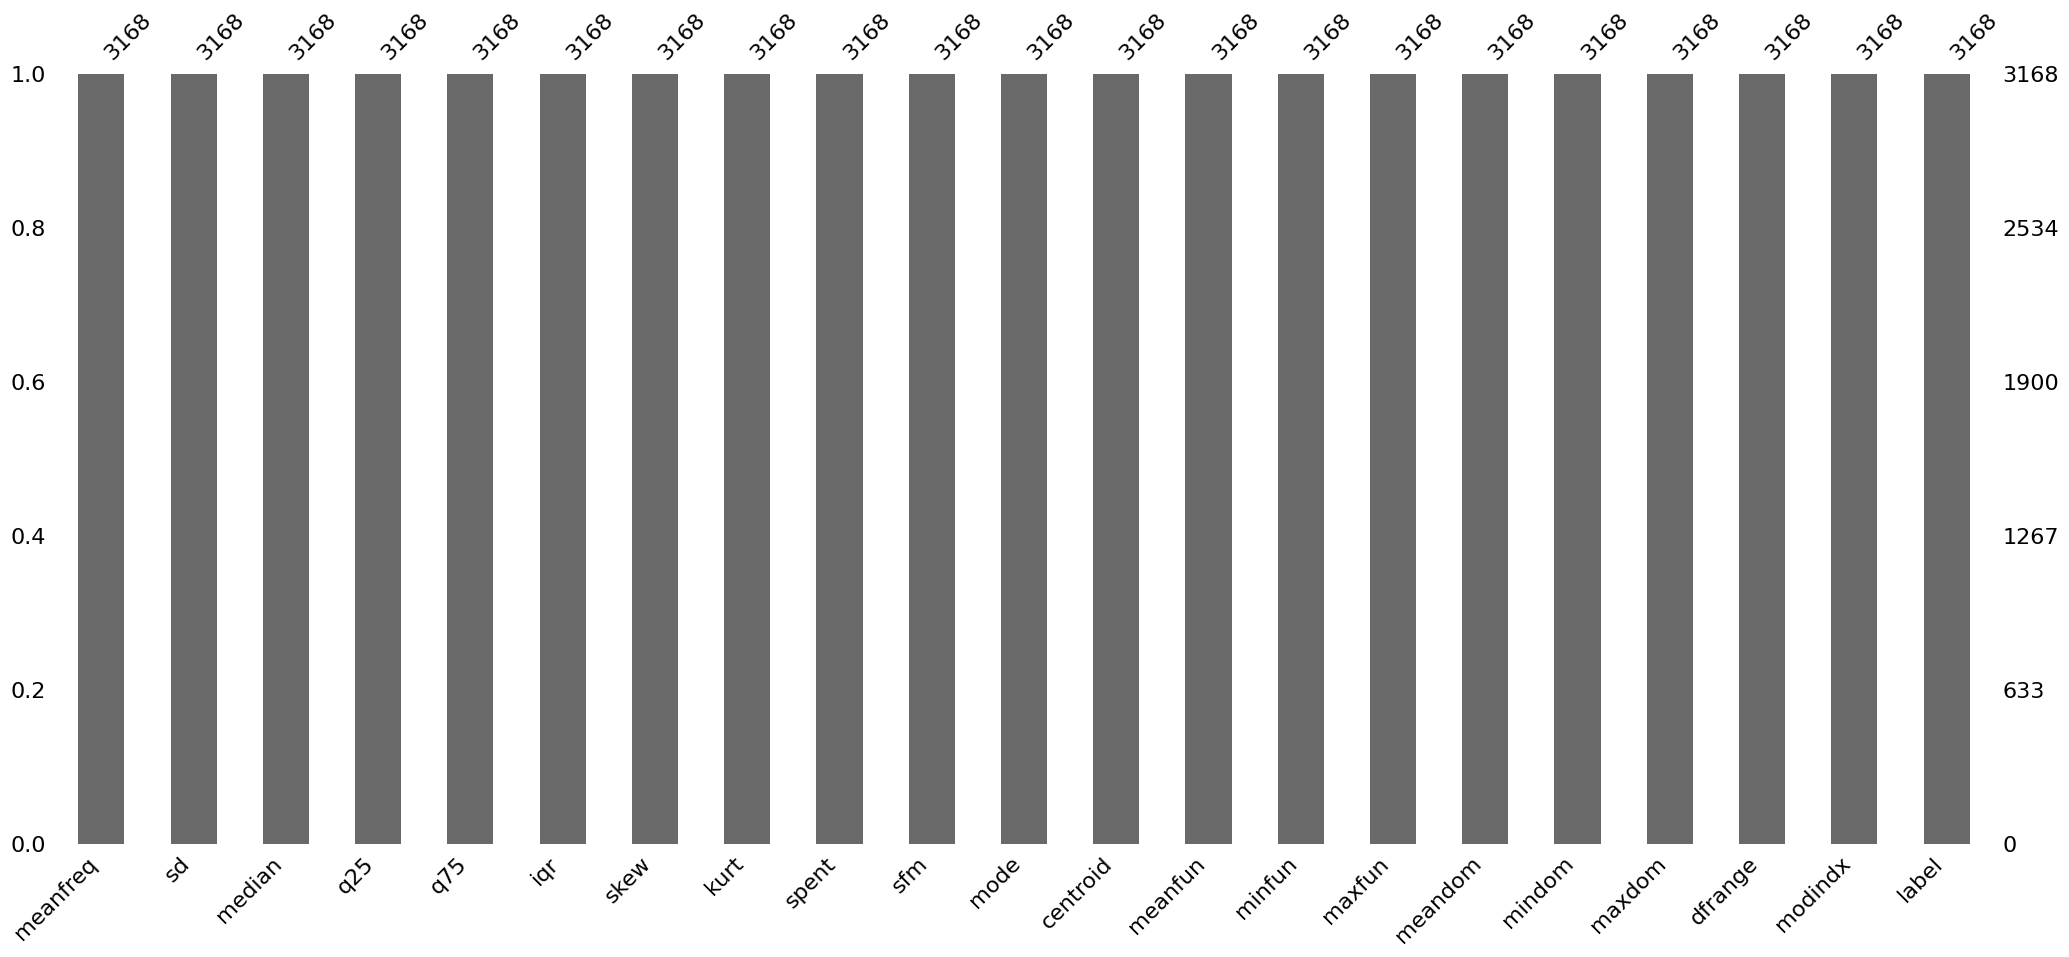

In [ ]:
# проверим, чтобы все числовые значения в датасете были полностью заполнены
clean(dataframe)

<Axes: >

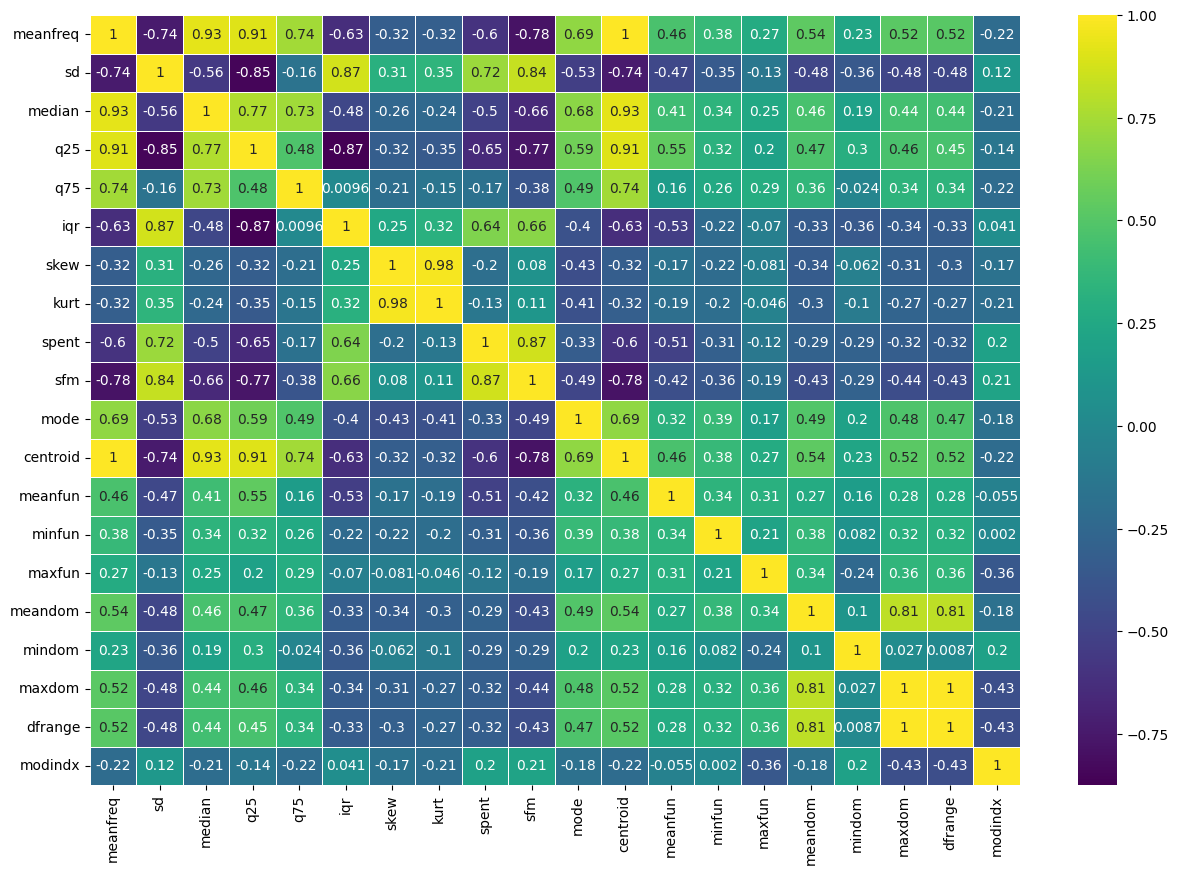

In [ ]:
# создаем тепловую карту (heatmap) для визуализации корреляций
plt.figure(figsize=(15,10),dpi=100)
sns.heatmap(dataframe.corr(), cmap="viridis", annot=True, linewidth=0.5)

In [ ]:
# рассмотрим медианное значение и сравним его с максимальным значением для диапазона доминирующей частоты в акустическом сигнале
fig = go.Figure(go.Indicator(
    mode = "gauge+number",
    value = 4.94,
    title = {'text': "Медиана для диапазона доминирующей частоты в акустическом сигнале"},
    domain = {'x': [0, 1], 'y': [0, 1]}
))

fig.show()


fig = go.Figure(go.Indicator(
    mode = "number+gauge+delta",
    gauge = {'shape': "bullet"},
    delta = {'reference': 21.5},
    value = 4.94,
    domain = {'x': [0.1, 1], 'y': [0.2, 0.9]}))
fig.update_layout(title_text='Сравнение медианы и максимального значения для диапазона доминирующей частоты в акустическом сигнале', title_x=0.5,)
fig.show()

In [ ]:
# рассмотрим значение ключевых показателей
fig = go.Figure(go.Indicator(
    mode = "number+gauge+delta",
    gauge = {'shape': "bullet"},
    delta = {'reference': 0.08},
    value = 0.06,
    domain = {'x': [0.1, 1], 'y': [0.2, 0.9]},))
fig.update_layout(title_text='Расстояние от STD (стандартное отклонение) и MEAN (среднее значение) для *Mean Dom*', title_x=0.4,)
fig.show()

fig = go.Figure(go.Indicator(
    mode = "number+gauge+delta",
    gauge = {'shape': "bullet"},
    delta = {'reference': 0.25},
    value = 0.08,
    domain = {'x': [0.1, 1], 'y': [0.2, 0.9]}))
fig.update_layout(title_text='Расстояние от STD (стандартное отклонение) и MEAN (среднее значение) для *IQR*', title_x=0.4,)
fig.show()

In [ ]:
# рассмотрим распределение данных и их связь между "q25" и "q75", а также их связь с категорией "label (male, female)"
fig = px.scatter(dataframe, x="q25", y="q75", color="label", size='median', hover_data=['label'])
fig.show()

In [ ]:
# преобразуем строковые метки в числовые значения для колонки 'label': male = 1, female = 0
dict = {'label':{'male':1,'female':0}}
dataframe.replace(dict,inplace = True)
x = dataframe.loc[:, dataframe.columns != 'label']
y = dataframe.loc[:,'label']

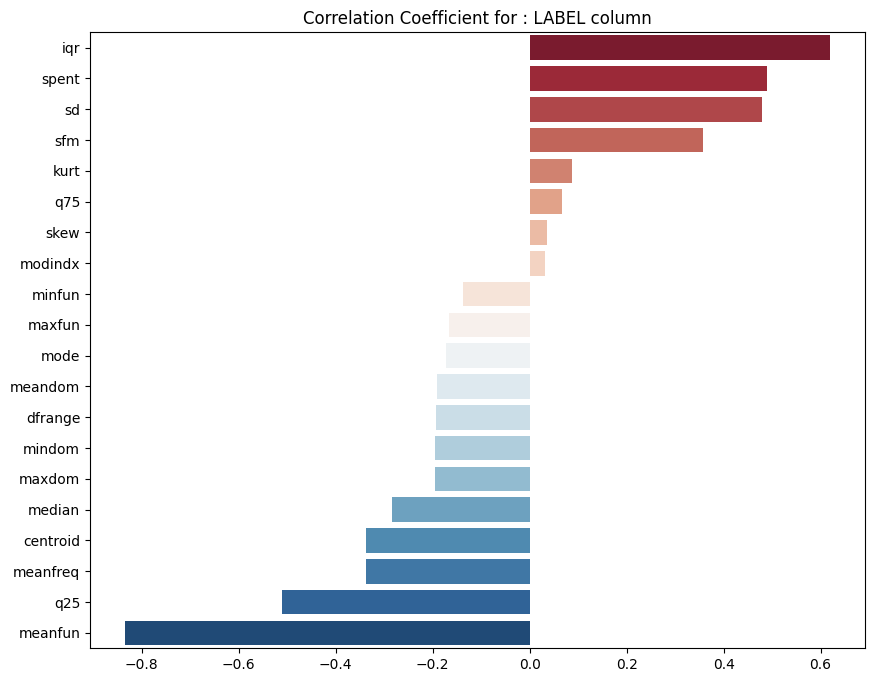

In [ ]:
# рассмотрим, какие столбцы имеют наибольшую корреляцию с колонкой 'label'
def target_coeff(dataframe,target):
    data = dataframe.corr()[target].sort_values(ascending=False)
    indices = data.index
    labels = []
    corr = []
    for i in range(1, len(indices)):
        labels.append(indices[i])
        corr.append(data[i])
    plt.figure(figsize=(10,8),dpi=100)
    sns.barplot(x=corr, y=labels, palette="RdBu")
    plt.title('Correlation Coefficient for : {} column'.format(target.upper()))
    plt.show()

target_coeff(dataframe,'label')

In [ ]:
# рассмотрим распределение данных в разных интервалах
def distribution(x,title):
    plt.figure(figsize=(15,6))
    ax = sns.distplot(x, kde=False,bins=30)
    values = np.array([rec.get_height() for rec in ax.patches])
    norm = plt.Normalize(values.min(), values.max())
    colors = plt.cm.jet(norm(values))
    for rec, col in zip(ax.patches,colors):
        rec.set_color(col)
    plt.title(title, size=20, color='black')

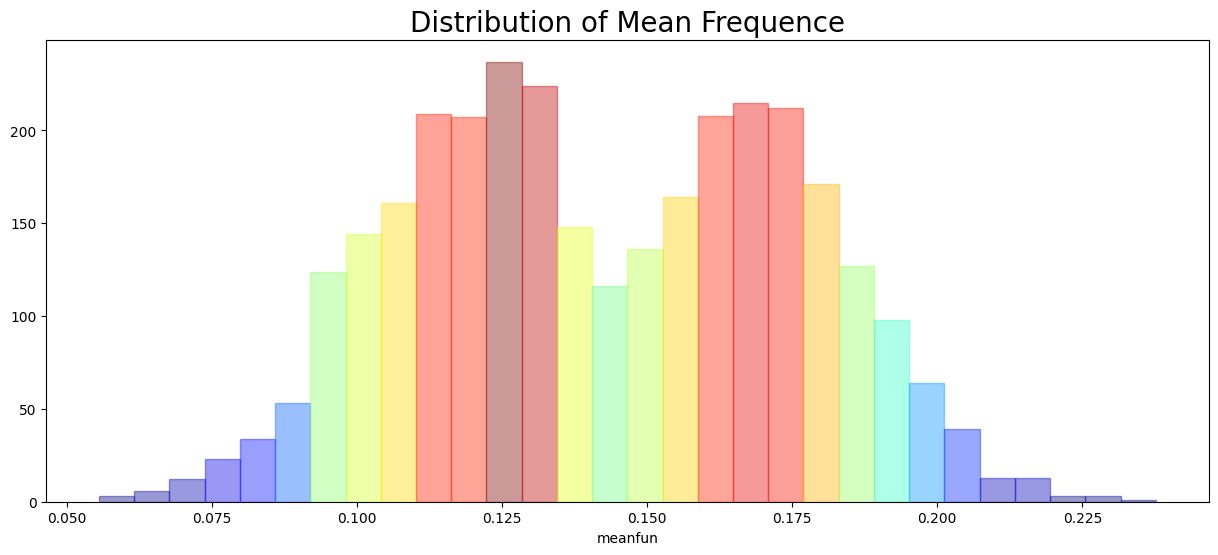

In [ ]:
# рассмотрим распределение средней частоты для 'meanfun'
distribution(dataframe.meanfun,'Distribution of Mean Frequence')

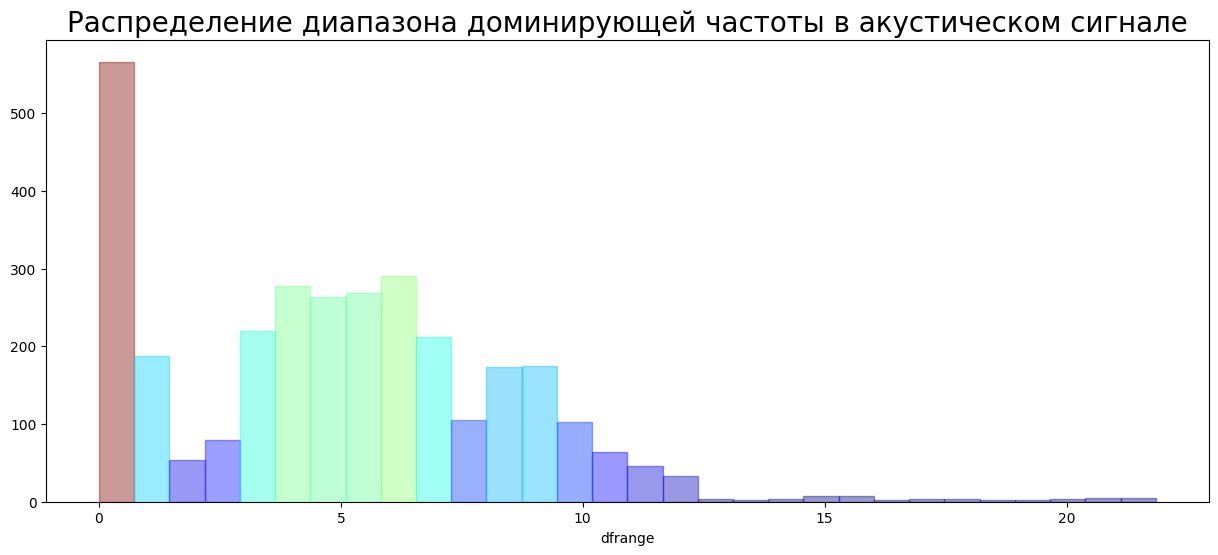

In [ ]:
# рассмотрим распределение диапазона доминирующей частоты в акустическом сигнале из 'dfrange'
distribution(dataframe.dfrange,'Распределение диапазона доминирующей частоты в акустическом сигнале')

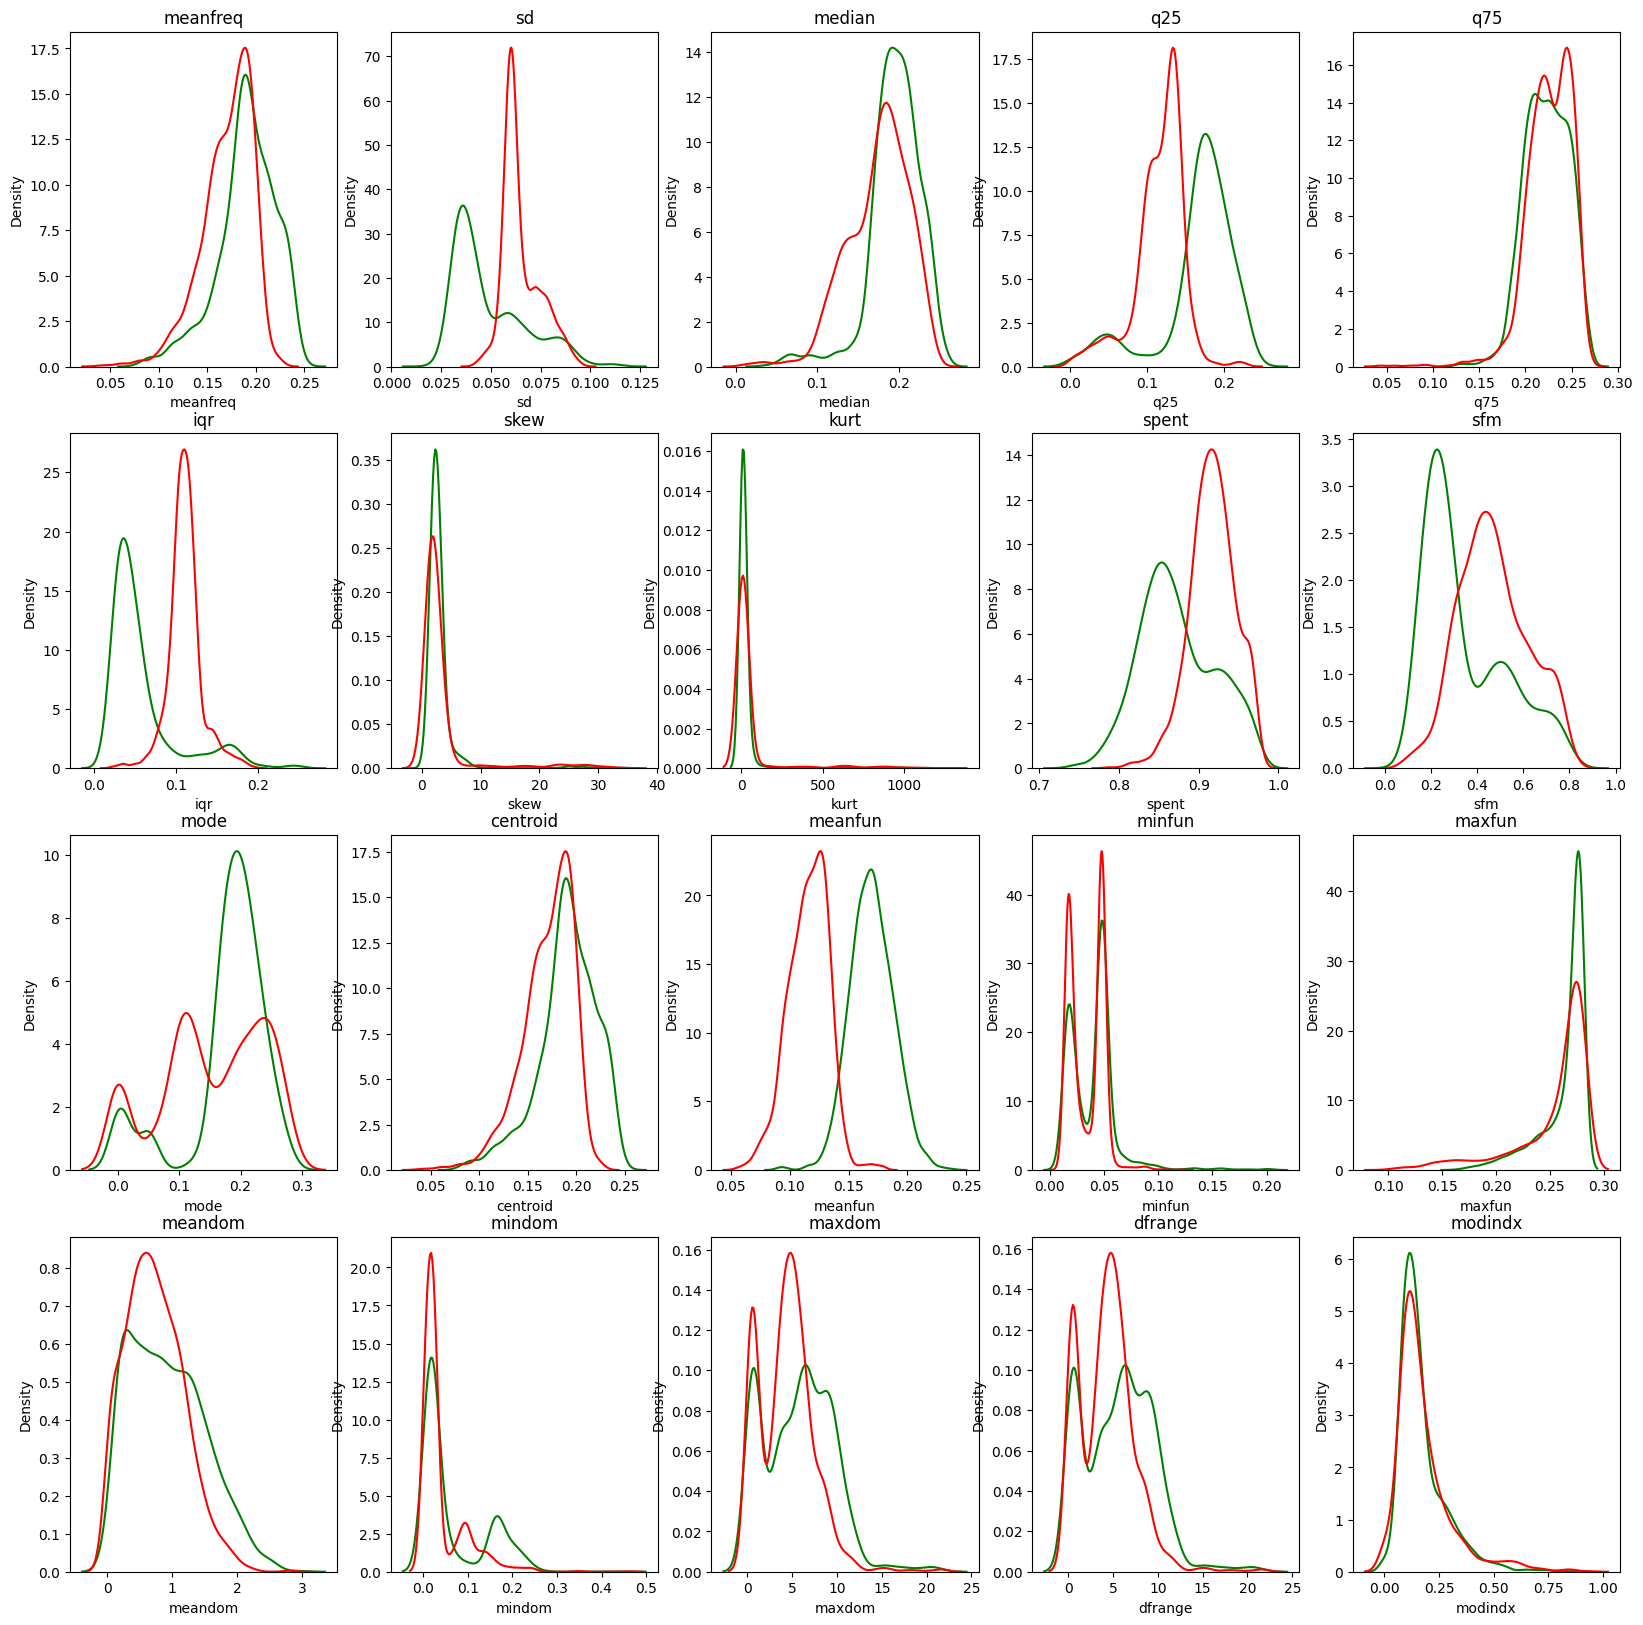

In [ ]:
# рассмотрим KDE разделенные по классам (female = 0, male = 1)
plt.subplots(4,5,figsize=(20,20))
for k in range(1,21):
    plt.subplot(4,5,k)
    plt.title(dataframe.columns[k-1])
    sns.kdeplot(dataframe.loc[dataframe['label'] == 0, dataframe.columns[k-1]], color= 'green', label='F')
    sns.kdeplot(dataframe.loc[dataframe['label'] == 1, dataframe.columns[k-1]], color= 'red', label='M')

In [ ]:
# разделим данные с использованием Repeated Stratified K-Fold
X = dataframe.drop('label',axis=1)
y = dataframe[['label']]
rskf = RepeatedStratifiedKFold(n_splits=7, n_repeats=3, random_state=42)

lst_accu_stratified = []
for train_index, test_index in rskf.split(X, y):
    x_train, x_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

In [ ]:
# модель логистической регрессии

In [ ]:
# пропишем функцию для модели логистической регрессии
def log_reg_with_repeat_fold(data,model):
    X = data.drop('label',axis=1)
    y = data[['label']]
    rskf = RepeatedStratifiedKFold(n_splits=7, n_repeats=3, random_state=42)

    lst_accu_stratified = []
    for train_index, test_index in rskf.split(X, y):
        x_train, x_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        model.fit(x_train, y_train)
        lst_accu_stratified.append(model.score(x_test, y_test))

    print('List of possible accuracy:', lst_accu_stratified)
    print('\nMaximum Accuracy That can be obtained from this model is:',
          max(lst_accu_stratified)*100, '%')
    print('\nMinimum Accuracy:',
          min(lst_accu_stratified)*100, '%')
    print('\nOverall Accuracy:',
          np.mean(lst_accu_stratified)*100, '%')
    print('\nStandard Deviation is:', np.std(lst_accu_stratified))

    print("\n*Train and Test sets are splited")
    print("Train data shape:{}".format(x_train.shape))
    print("Test data shape:{}".format(x_test.shape))

    # сохраним модель
    filename = 'log_reg.pkl'
    joblib.dump(model, filename)
    print('\nLogistic Regression model Saved Successfully')
    return model

In [ ]:
# рассмотрим результат обучения модели логистической регрессии
log_reg = log_reg_with_repeat_fold(data=dataframe, model=linear_model.LogisticRegression())

List of possible accuracy: [0.9072847682119205, 0.8807947019867549, 0.9006622516556292, 0.891832229580574, 0.9070796460176991, 0.8849557522123894, 0.9269911504424779, 0.8278145695364238, 0.8631346578366446, 0.8123620309050773, 0.7748344370860927, 0.7964601769911505, 0.911504424778761, 0.8761061946902655, 0.9028697571743929, 0.8984547461368654, 0.9116997792494481, 0.9116997792494481, 0.918141592920354, 0.8960176991150443, 0.8982300884955752]

Maximum Accuracy That can be obtained from this model is: 92.69911504424779 %

Minimum Accuracy: 77.48344370860927 %

Overall Accuracy: 88.09014492510944 %

Standard Deviation is: 0.04129284029006482

*Train and Test sets are splited
Train data shape:(2716, 20)
Test data shape:(452, 20)

Logistic Regression model Saved Successfully


In [ ]:
# рассмотрим размерность исходных данных датасета
shape = dataframe.shape
print("Размерность данных:", shape)

Размерность данных: (3168, 21)


In [ ]:
# определим фактическое количество признаков
input_shape =  X.shape[1]
print("Фактическое количество признаков:", input_shape)

Фактическое количество признаков: 20


In [ ]:
# определим переменную input_shape
input_shape = 20
input_shape = (X.shape[1],)

In [ ]:
# определим функцию create_model, которая создает нейронную сеть
def create_model(input_shape):
    model = Sequential()

    # входной слой
    model.add(Dense(256, input_shape=input_shape, activation="relu"))
    model.add(Dropout(0.3))

    # скрытые слои
    model.add(Dense(256, activation="relu"))
    model.add(Dropout(0.3))
    model.add(Dense(128, activation="relu"))
    model.add(Dropout(0.3))
    model.add(Dense(64, activation="relu"))
    model.add(Dropout(0.3))

    # выходной слой
    model.add(Dense(1, activation="sigmoid"))

    # компиляция модели
    model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

    model.summary()
    return model

In [ ]:
# определим и переменную model
model = create_model(input_shape)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               5376      
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 64)                8

In [ ]:
# пропишем класс callback
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy')>0.94):
            print("\nReached 94% accuracy so cancelling training!")
            self.model.stop_training = True

In [ ]:
# определим переменную callbacks
callbacks = myCallback()

In [ ]:
# обучаем модель нейронной сети на train наборе данных

# определим batch_size и количество эпох обучения
batch_size = 64
epochs = 100

# обучаем модель на train наборе данных
model.fit(x_train, y_train, epochs=epochs,
          batch_size=batch_size,
          callbacks=[callbacks])

Epoch 1/100
43/43 [==============================] - 2s 10ms/step - loss: 1.0457 - accuracy: 0.4982
Epoch 2/100
43/43 [==============================] - 0s 11ms/step - loss: 0.9047 - accuracy: 0.4989
Epoch 3/100
43/43 [==============================] - 0s 10ms/step - loss: 0.7737 - accuracy: 0.5107
Epoch 4/100
43/43 [==============================] - 0s 11ms/step - loss: 0.7817 - accuracy: 0.5346
Epoch 5/100
43/43 [==============================] - 0s 10ms/step - loss: 0.7604 - accuracy: 0.5147
Epoch 6/100
43/43 [==============================] - 1s 12ms/step - loss: 0.7483 - accuracy: 0.5284
Epoch 7/100
43/43 [==============================] - 0s 10ms/step - loss: 0.7539 - accuracy: 0.5409
Epoch 8/100
43/43 [==============================] - 0s 11ms/step - loss: 0.7036 - accuracy: 0.5777
Epoch 9/100
43/43 [==============================] - 0s 10ms/step - loss: 0.6912 - accuracy: 0.6443
Epoch 10/100
43/43 [==============================] - 0s 11ms/step - loss: 0.6509 - accuracy: 0.6683

In [ ]:
# сохраним модель
model.save('model.h5')

In [ ]:
# загружаем веса
model.load_weights('model.h5')

In [ ]:
# выполним оценку производительности модели на test наборе данных
print(f"Evaluating the model using {len(x_test)} samples...")
loss, accuracy = model.evaluate(x_test,y_test, verbose=0)
print(f"Loss: {loss:.4f}")
print(f"Accuracy: {accuracy*100:.2f}%")

Evaluating the model using 452 samples...
Loss: 0.1754
Accuracy: 93.36%


In [ ]:
# пропишем цикл для предсказаний
preds = []

for i in range(0,len(x_test)):
    preds.append(model.predict(x_test)[i][0])

predictions = [1 if val >0.5 else 0 for val in preds]

15/15 [==============================] - 0s 2ms/step


In [ ]:
# выводим результат бинарных предсказаний
print("Overall Accuracy Score is : {}".format(accuracy_score(y_test, predictions)))

Overall Accuracy Score is : 0.9336283185840708


In [ ]:
# рассмотрим кривую ROC и площадь под этой кривой (AUC) для нейронной модели
y_pred_keras = model.predict(x_test).ravel()
fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test, y_pred_keras)
auc_keras = auc(fpr_keras, tpr_keras)

15/15 [==============================] - 0s 2ms/step


In [ ]:
# рассмотрим кривую ROC и площадь под этой кривой (AUC) для логистической модели
y_pred_lr = log_reg.predict_proba(x_test)[:, 1]
fpr_lr, tpr_lr, thresholds_rf = roc_curve(y_test, y_pred_lr)
auc_lr = auc(fpr_lr, tpr_lr)

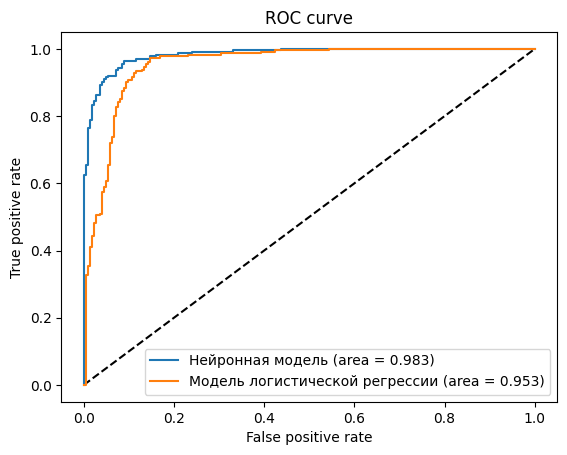

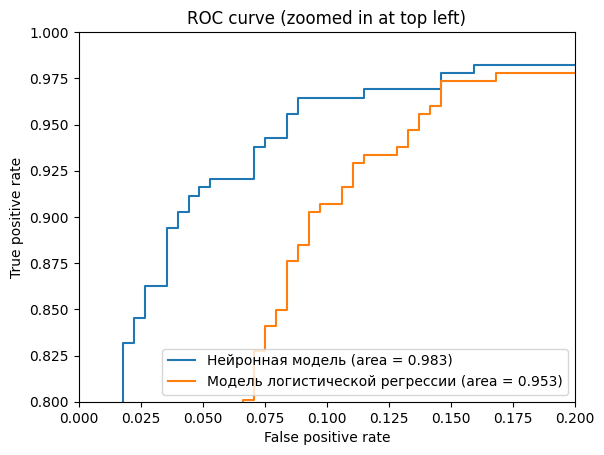

In [ ]:
# визуализируем производительность двух моделей (нейронная и логистическая регрессия)
plt.figure(1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Нейронная модель (area = {:.3f})'.format(auc_keras))
plt.plot(fpr_lr, tpr_lr, label='Модель логистической регрессии (area = {:.3f})'.format(auc_lr))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show()
plt.figure(2)
plt.xlim(0, 0.2)
plt.ylim(0.8, 1)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_keras, tpr_keras, label='Нейронная модель (area = {:.3f})'.format(auc_keras))
plt.plot(fpr_lr, tpr_lr, label='Модель логистической регрессии (area = {:.3f})'.format(auc_lr))
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve (zoomed in at top left)')
plt.legend(loc='best')
plt.show()

In [ ]:
# пропишем функцию визуализации предсказаний модели и распределения вероятностей для положительных и отрицательных классов
def plot_pdf(y_pred, y_test, name=None, smooth=500):
    positives = y_pred[y_test.label == 1]
    negatives = y_pred[y_test.label == 0]
    N = positives.shape[0]
    n =10
    s = positives
    p, x = np.histogram(s, bins=n)
    x = x[:-1] + (x[1] - x[0])/2
    f = UnivariateSpline(x, p, s=n)
    plt.plot(x, f(x))

    N = negatives.shape[0]
    n = 10
    s = negatives
    p, x = np.histogram(s, bins=n)
    x = x[:-1] + (x[1] - x[0])/2
    f = UnivariateSpline(x, p, s=n)
    plt.plot(x, f(x))
    plt.xlim([0.0, 1.0])
    plt.xlabel('density')
    plt.ylabel('density')
    plt.title('PDF-{}'.format(name))
    plt.show()

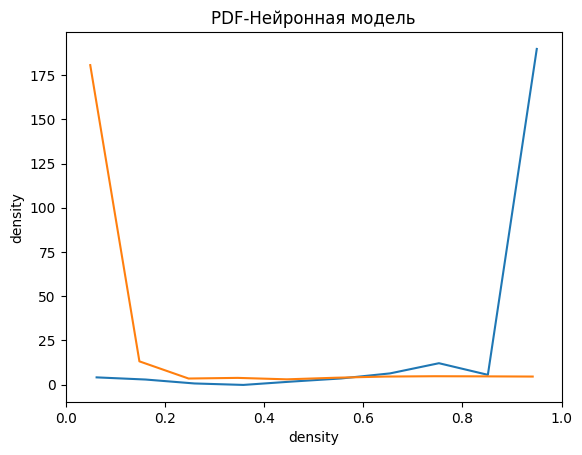

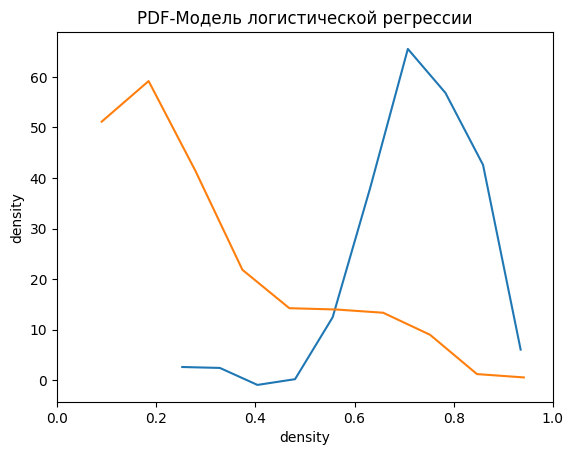

In [ ]:
# выведем графики плотности вероятности для обеих моделей
plot_pdf(y_pred_keras, y_test, 'Нейронная модель')
plot_pdf(y_pred_lr, y_test, 'Модель логистической регрессии')